In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
pitches = pd.read_csv("../pitches.csv")
atbats = pd.read_csv("../atbats.csv")
pitcher_names = pd.read_csv("../player_names.csv")
pitches.head()

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,event_num,b_score,ab_id,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b
0,0.416,2.963,92.9,84.1,2305.052,159.235,-25.0,3.2,23.7,7.665,...,3,0.0,2.015000e+09,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.191,2.347,92.8,84.1,2689.935,151.402,-40.7,3.4,23.7,12.043,...,4,0.0,2.015000e+09,0.0,1.0,0.0,2.0,0.0,0.0,0.0
2,-0.518,3.284,94.1,85.2,2647.972,145.125,-43.7,3.7,23.7,14.368,...,5,0.0,2.015000e+09,0.0,2.0,0.0,3.0,0.0,0.0,0.0
3,-0.641,1.221,91.0,84.0,1289.590,169.751,-1.3,5.0,23.8,2.104,...,6,0.0,2.015000e+09,0.0,2.0,0.0,4.0,0.0,0.0,0.0
4,-1.821,2.083,75.4,69.6,1374.569,280.671,18.4,12.0,23.8,-10.280,...,7,0.0,2.015000e+09,1.0,2.0,0.0,5.0,0.0,0.0,0.0


In [6]:
atbats.head()

,ab_id,batter_id,event,g_id,inning,o,p_score,p_throws,pitcher_id,stand,top
0,2015000001,572761,Groundout,201500001,1,1,0,L,452657,L,True
1,2015000002,518792,Double,201500001,1,1,0,L,452657,L,True
2,2015000003,407812,Single,201500001,1,1,0,L,452657,R,True
3,2015000004,425509,Strikeout,201500001,1,2,0,L,452657,R,True
4,2015000005,571431,Strikeout,201500001,1,3,0,L,452657,L,True


In [7]:
pitcher_names.head()

,id,first_name,last_name
0,452657,Jon,Lester
1,425794,Adam,Wainwright
2,457435,Phil,Coke
3,435400,Jason,Motte
4,519166,Neil,Ramirez


In [21]:
#Slices out the columns we don't care about
pitches = pitches.loc[:, 'code':]
pitches

,code,type,pitch_type,event_num,b_score,ab_id,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b
0,C,S,FF,3,0.0,2.015000e+09,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,S,S,FF,4,0.0,2.015000e+09,0.0,1.0,0.0,2.0,0.0,0.0,0.0
2,F,S,FF,5,0.0,2.015000e+09,0.0,2.0,0.0,3.0,0.0,0.0,0.0
3,B,B,FF,6,0.0,2.015000e+09,0.0,2.0,0.0,4.0,0.0,0.0,0.0
4,B,B,CU,7,0.0,2.015000e+09,1.0,2.0,0.0,5.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2867149,D,X,SL,568,1.0,2.018186e+09,3.0,2.0,2.0,9.0,0.0,0.0,0.0
2867150,B,B,FF,572,1.0,2.018186e+09,0.0,0.0,2.0,1.0,1.0,0.0,0.0
2867151,F,S,FF,577,1.0,2.018186e+09,1.0,0.0,2.0,2.0,0.0,1.0,0.0
2867152,S,S,FF,578,1.0,2.018186e+09,1.0,1.0,2.0,3.0,0.0,1.0,0.0


In [27]:
#Check data types
pitches.dtypes

code           object
type           object
pitch_type     object
event_num       int64
b_score       float64
ab_id         float64
b_count       float64
s_count       float64
outs          float64
pitch_num     float64
on_1b         float64
on_2b         float64
on_3b         float64
dtype: object

In [33]:
#Check for nans and  null values and removes them if there are
if len(pitches[pd.isnull(pitches).any(axis=1)]) > 0:
    pitches = pitches[~pd.isnull(pitches).any(axis=1)]
len(pitches)
if len(atbats[pd.isnull(atbats).any(axis=1)]) > 0:
    atbats = atbats[~pd.isnull(atbats).any(axis=1)]
if len(pitcher_names[pd.isnull(pitcher_names).any(axis=1)]) > 0:
    pitcher_names = pitcher_names[~pd.isnull(pitcher_names).any(axis=1)]    
    

2847250

In [56]:
#Convert last 3 columns to booleans
pitches.loc[:,['on_1b']] = pitches.loc[:,('on_1b')].astype('bool')
pitches.loc[:,['on_2b']] = pitches.loc[:,('on_2b')].astype('bool')
pitches.loc[:,['on_3b']] = pitches.loc[:,('on_3b')].astype('bool')
pitches.dtypes

code           object
type           object
pitch_type     object
event_num       int64
b_score       float64
ab_id         float64
b_count       float64
s_count       float64
outs          float64
pitch_num     float64
on_1b            bool
on_2b            bool
on_3b            bool
dtype: object

Text(0, 0.5, 'Count')

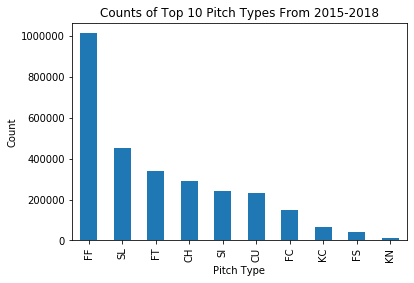

In [63]:
#Plotting counts of pitch type
pitches.pitch_type.value_counts().sort_values(ascending=False).head(10).plot.bar()
plt.title("Counts of Top 10 Pitch Types from 2015-2018")
plt.xlabel("Pitch Type")
plt.ylabel("Count")

<BarContainer object of 6 artists>

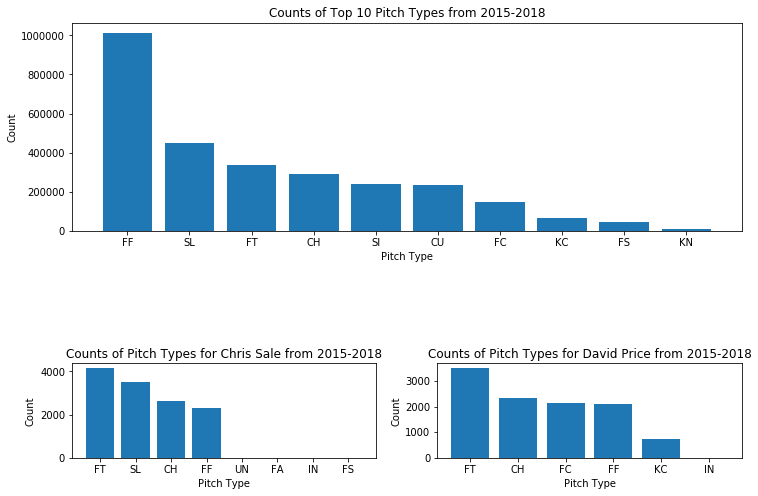

In [181]:
gridsize = (4,2)
fig = plt.figure(figsize=(12,8))
ax1 = plt.subplot2grid(gridsize, (0,0), colspan = 2, rowspan = 2)
ax2 = plt.subplot2grid(gridsize, (3,0))
ax3 = plt.subplot2grid(gridsize, (3,1))
ax1.set_title('Counts of Top 10 Pitch Types from 2015-2018')
ax1.set_xlabel('Pitch Type')
ax1.set_ylabel('Count')
ax1.bar(x = list(pitches.pitch_type.value_counts().axes[0].values)[0:10], height = list(pitches.pitch_type.value_counts().values)[0:10])
chris_sale = pitcher_names.loc[pitcher_names['first_name'] == 'Chris'].loc[pitcher_names['last_name'] == 'Sale'].iloc[0,0]
david_price = pitcher_names.loc[pitcher_names['first_name'] == 'David'].loc[pitcher_names['last_name'] == 'Price'].iloc[0,0]
#Joins the pitches and atbats data frames together
pitch_atbat = pitches.set_index('ab_id').join(atbats.set_index('ab_id'))
#Gets count values for Sale and Price
sale_pitches = pitch_atbat.loc[pitch_atbat['pitcher_id'] == chris_sale].pitch_type.value_counts()
dprice_pitches = pitch_atbat.loc[pitch_atbat['pitcher_id'] == david_price].pitch_type.value_counts()
ax2.set_title('Counts of Pitch Types for Chris Sale from 2015-2018')
ax2.set_xlabel('Pitch Type')
ax2.set_ylabel('Count')
ax2.bar(x = list(sale_pitches.axes[0].values), height = list(sale_pitches.values))
ax3.set_title('Counts of Pitch Types for David Price from 2015-2018')
ax3.set_xlabel('Pitch Type')
ax3.set_ylabel('Count')
ax3.bar(x = list(dprice_pitches.axes[0].values), height = list(dprice_pitches.values))

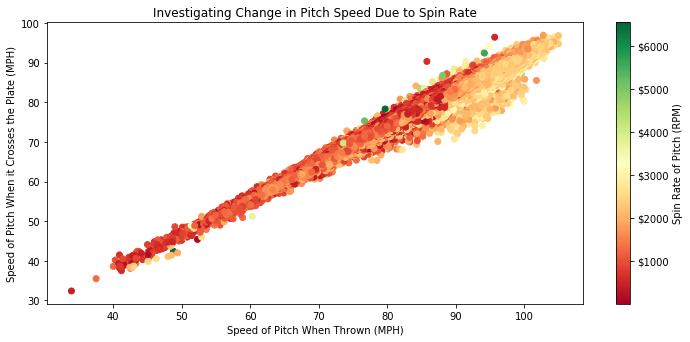

In [70]:
pitches2 = pd.read_csv("../pitches.csv")
fig = plt.figure(figsize=(12,8))
ax1 = plt.subplot2grid((3,2), (0,0), colspan = 2, rowspan = 2)
ax1.set_title('Investigating Change in Pitch Speed Due to Spin Rate')
ax1.set_xlabel("Speed of Pitch When Thrown (MPH)")
ax1.set_ylabel("Speed of Pitch When it Crosses the Plate (MPH)")
sctr = ax1.scatter(x =pitches2.start_speed, y=pitches2.end_speed, c = pitches2.spin_rate, cmap='RdYlGn')
cbar = plt.colorbar(sctr, ax=ax1)
cbar.set_label('Spin Rate of Pitch (RPM)')